In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [3]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [4]:
df.head()

,feature1,feature2,target
0,-0.689541,-1.972659,-122.362412
1,-0.719864,-0.744702,-42.907976
2,0.488206,-0.266567,29.643152
3,1.605032,0.060113,30.398501
4,-1.618367,0.611109,-25.162114


In [5]:
df.shape

(100, 3)

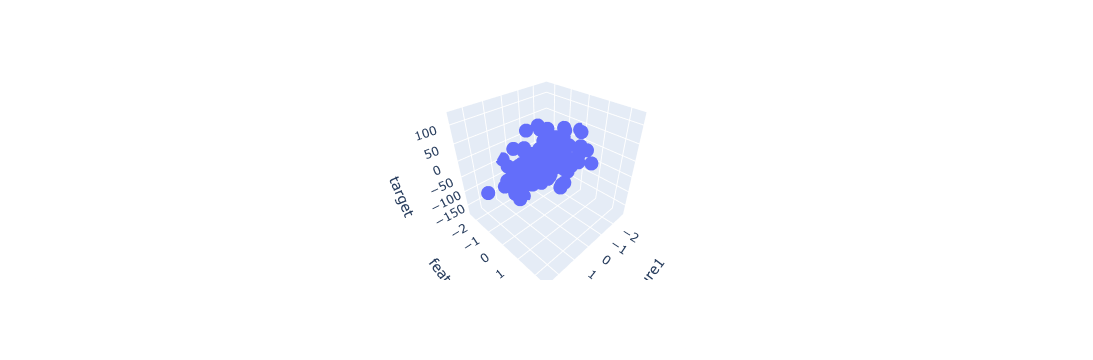

In [6]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)

In [12]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 37.88986158429314
MSE 2234.473294770642
R2 score 0.15511656506097204


In [13]:
# Grid for prediction
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(x, y)

# Create (x, y) pairs for prediction
final = np.vstack((xGrid.ravel(), yGrid.ravel())).T

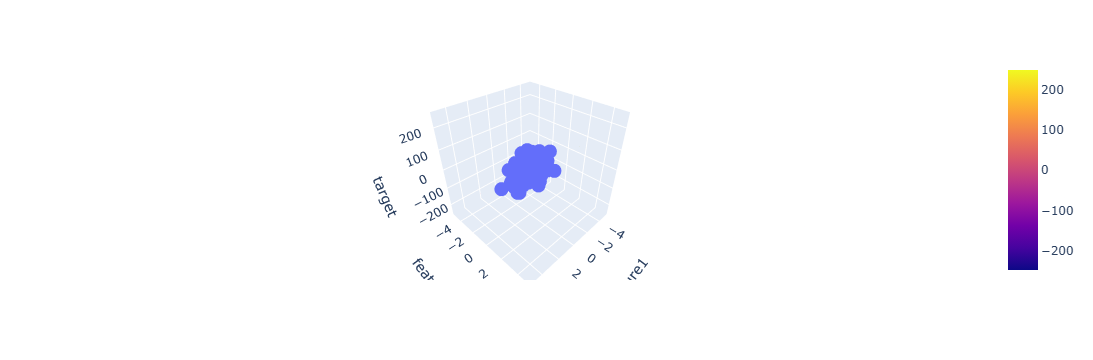

In [14]:
# Predict z values for the surface
z = lr.predict(final).reshape(xGrid.shape)

fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x=xGrid, y=yGrid, z=z))

fig.show()